In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [14]:
# simulating the experiment
hvs_df = pd.read_csv("data/Szenarienübersicht KatasterKi Okt19 - HVS.csv", header=1)
print(hvs_df.shape)
hvs_df.head(5)

(2372, 15)


,Basisszenario,FS-Art,FS-Aufkommen,FS-Geschwindigkeit,RVA-Breite,RVA-Lage,RVA-Oberfläche,Tr_li-Breite,Tr_li-Markierung,Tr_li-baulTennung,Tr_re-Breite,Tr_re-Markierung,Parken,HVS_lD,Häufigkeit
0,1,Kfz,normal,50,-,-,-,-,-,-,-,-,-,1,1
1,2,Kfz,normal,50,schmal,FS-Parken/Seitenraum,Asphalt,schmal,unterbrochen,-,-,-,-,2,1
2,3,Kfz,normal,50,-,-,-,-,-,-,-,-,Längs,3,1
3,4,Kfz,normal,50,breit,FS-Parken/Seitenraum,Asphalt,schmal,unterbrochen,-,-,-,-,4,1
4,5,Kfz,normal,50,schmal,FS-Parken/Seitenraum,Asphalt,schmal,unterbrochen,-,-,-,Längs,5,1


In [15]:
nvs_df = pd.read_csv("data/Szenarienübersicht KatasterKi Okt19 - Nebenstraßen.csv", header=1)
print(nvs_df.shape)
nvs_df.head(5)

(75, 7)


,Basisszenario,FS-Art,besondere Merkmale,FS-Breite,Parken,NVS_lD,Häufigkeit
0,1,Einbahn-hin,-,breit,-,1,1
1,2,Einbahn-hin,-,breit,einseitig,2,1
2,3,Einbahn-hin,-,breit,beidseitig,3,1
3,4,Einbahn-hin,-,schmal,-,4,1
4,5,Einbahn-hin,-,schmal,einseitig,5,1


In [16]:
sr_df = pd.read_csv("data/Szenarienübersicht KatasterKi Okt19 - Seitenraum.csv", header=1)
print(sr_df.shape)
sr_df.head(2)

(750, 12)


,Basisszenario,Linksseitig,Tr_li-Breite,Tr_li-Art,RVA-Breite,Tr_re-Breite,Tr_re-Art,GW-Breite,GW-Geschäftsnutzung,Häuserfront,SR_lD,Häufigkeit
0,1,Parken,schmal,Aufpflasterung,schmal,-,-,schmal,-,normal,19,1
1,3,Grünanlage,schmal,Aufpflasterung,schmal,-,-,schmal,-,normal,21,1


In [74]:
pool_scenes = hvs_df.shape[0] + nvs_df.shape[0] + sr_df.shape[0]
all_scenes = pd.concat([hvs_df, nvs_df, sr_df], sort=False, keys=["hvs", "nvs", "sr"])
all_scenes = all_scenes.reset_index()

min_subjects = 2000
min_answers = 10

nvs_data = []
bus_data = []

for simulation in range(100):
    experiment_df = pd.DataFrame()
    for subject in range(min_subjects):
        subject_sample = all_scenes.sample(n=10)
        subject_sample["subject"] = subject
        experiment_df = experiment_df.append(subject_sample)
    a, b = important_metrics(experiment_df)
    nvs_data.append(a)
    bus_data.append(b)

sns.distplot(nvs_data)
sns.distplot(bus_data)

422
(47,)
436
(38,)
398
(46,)
433
(57,)
442
(58,)
409
(45,)
412
(47,)
405
(55,)
420
(61,)
415
(60,)
454
(62,)
425
(49,)
385
(47,)
396
(38,)
459
(47,)
400
(38,)
420
(52,)
433
(55,)
429
(58,)
419
(36,)
398
(52,)
429
(42,)
383
(40,)
401
(57,)
434
(44,)
398
(39,)
418
(65,)
419
(50,)
405
(62,)
446
(46,)
438
(53,)
416
(48,)
407
(54,)
381
(74,)
418
(46,)
456
(46,)
416
(63,)
426
(51,)
463
(49,)
436
(52,)
412
(46,)
427
(50,)
395
(51,)
386
(47,)
422
(64,)
435
(46,)
428
(62,)
403
(38,)
402
(37,)
439
(47,)
426
(64,)
411
(50,)
414
(47,)
407
(48,)
441
(44,)
427
(43,)
404
(45,)
407
(49,)
434
(37,)
408
(63,)
426
(50,)
422
(53,)
452
(54,)
439
(48,)
452
(43,)
399
(40,)
461
(60,)
409
(47,)
411
(49,)
433
(49,)
405
(52,)
425
(44,)
412
(53,)
438
(48,)
405
(55,)
423
(50,)
429
(57,)
436
(47,)
431
(58,)
423
(48,)
429
(59,)
415
(44,)
451
(51,)
462
(43,)
441
(56,)
445
(47,)
443
(57,)
433
(56,)
426
(43,)
397
(63,)
422
(59,)
401
(48,)
418
(41,)
396
(58,)
370
(48,)
420
(44,)
393
(51,)
430
(49,)
431
(63,)
415
(46,)


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [73]:
#experiment_df["level_0"].value_counts().plot("bar")
def important_metrics(experiment_df):
    a = print(experiment_df[experiment_df["level_0"] == "nvs"]["subject"].nunique())
#    print(experiment_df[experiment_df["level_0"] == "nvs"]["subject"].shape)
#    print(experiment_df[experiment_df["level_0"] == "nvs"]["subject"].value_counts().mean())
#    print(experiment_df[experiment_df["level_0"] == "nvs"]["subject"].value_counts().min())
#    print(experiment_df[experiment_df["level_0"] == "nvs"]["subject"].value_counts().max())

#    print(experiment_df[experiment_df["FS-Art"] == "Bus"]["subject"].nunique())
    b = print(experiment_df[experiment_df["FS-Art"] == "Bus"]["subject"].shape)
    return a, b


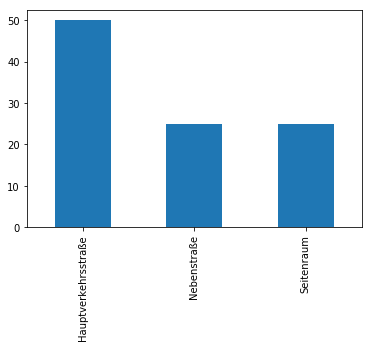

In [23]:
user_count = 5000
answers_per_user = 100

experiments = ["Hauptverkehrsstraße", "Nebenstraße", "Seitenraum"]
subjective_importance = np.array([50, 25, 25])

pd.Series(subjective_importance, index=experiments).plot("bar")

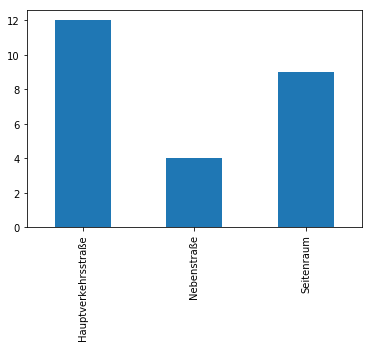

In [24]:
amount_parameters = np.array([12,4,9])

pd.Series(amount_parameters, index=experiments).plot("bar")

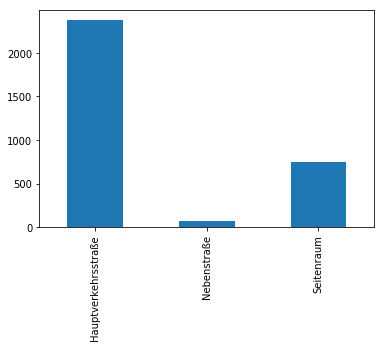

In [25]:
count_scenes = np.array([2372, 75, 750])
pd.Series(count_scenes, index=experiments).plot("bar")

In [12]:
import numpy as np

def get_prob(x):
    x=np.array(x)
    sum1 = np.sum(x)
    prob = x/sum1
    return prob

subjective_importance = get_prob(subjective_importance)
amount_parameters = get_prob(amount_parameters)
count_scenes = get_prob(count_scenes)

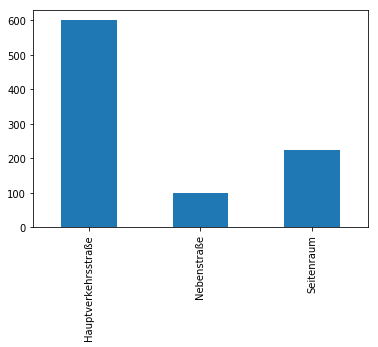

In [26]:
pd.Series(subjective_importance*amount_parameters, index=experiments).plot("bar")

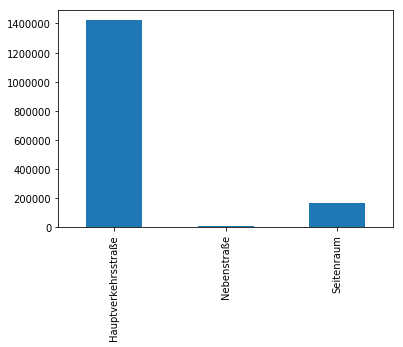

In [28]:
pd.Series(subjective_importance*amount_parameters*count_scenes, index=experiments).plot("bar")

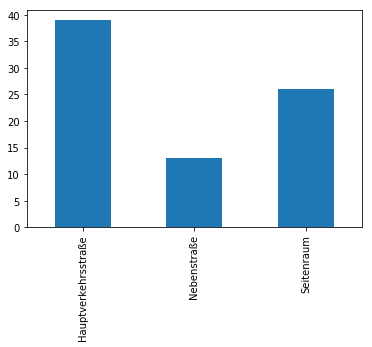

In [29]:
sum_parameterspace = [39, 13, 26]
pd.Series(sum_parameterspace, index=experiments).plot("bar")